# Imports

In [1]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import regex as re

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Loading transformed splits

In [3]:
pca_path = "../data/pca_files/"

In [4]:
X_test_transformed = np.load(pca_path+"100x100x3_X_test_transformed.npy")
X_train_transformed = np.load(pca_path+"100x100x3_X_train_transformed.npy")
y_test = np.load(pca_path+"100x100x3_y_test.npy")
y_train = np.load(pca_path+"100x100x3_y_train.npy")
print(X_train_transformed.shape,".....",y_train.shape)
print(X_test_transformed.shape,".....",y_test.shape)

(19805, 227)
(2201, 227)
(19805,)
(2201,)


# Model Imports

In [5]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from catboost import CatBoostClassifier

## RandomForestRegressor

In [ ]:
accuracy = []

#min_samples_leaf = [8,10,13]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None) # 90?
min_weight_fraction_leaf = np.linspace(0,0.5,5)
max_features = ['auto', 'sqrt',"log2"]

bootstrap = [True, False]

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 3600, stop = 3900, num = 4)]

#min_samples_leaf=[11,12,13,14]#np.linspace(2,30,11,dtype="int")
#,"max_features":["auto","sqrt","log2"]

for i in n_estimators:
    print(i,"in",n_estimators)
    # Random Forest -> 0.384
    model = RandomForestClassifier(n_estimators = i, n_jobs = -1, criterion="entropy"
                                    ,min_samples_split=15
                                    ,min_samples_leaf=11
                                    ,max_depth=90
                                    ,min_weight_fraction_leaf=0
                                    ,)
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    accuracy.append(accuracy_score(y_test,y_pred))

3600 in [3600, 3700, 3800, 3900]


In [ ]:
plt.plot(n_estimators,accuracy)

In [ ]:
y_pred = model.predict(X_test_transformed)
model.score(y_test,y_pred)

## DecisionTree

In [ ]:
accuracy = []

#criterion = 'gini' # 0.207
#splitter = 'best'
#min_samples_leaf = [8,10,13]

param_grid = {
     #,"min_samples_leaf": [40,70,100]
     #,"max_features":["auto","sqrt","log2"]
}

for i in [1]:
    print(i,"in","min_samples_leaf")
    # DecisionTree -> 0.231
    #model = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=70,min_samples_split=70,splitter="best")      
    # RadiusNeighClassifier -> 0.164
    #model = RadiusNeighborsClassifier(radius = 16500,n_jobs=-1,outlier_label="most_frequent",weights='distance'
    #                                  ,p=1)
    # KNN -> 0.3 with n=22 (algo/leaf makes no diff)
    #model = KNeighborsClassifier(n_neighbors=22,weights="distance")
    
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    accuracy.append(accuracy_score(y_test,y_pred))

In [ ]:
accuracy = []

#criterion = 'gini' # 0.207
#splitter = 'best'
#min_samples_leaf = [8,10,13]

param_grid = {
     #,"min_samples_leaf": [40,70,100]
     #,"max_features":["auto","sqrt","log2"]
}

for i in [1]:
    print(i,"in","min_samples_leaf")
    # Random Forest -> 0.3386
    #model = RandomForestClassifier(n_estimators = 400, n_jobs = -1, criterion="entropy"
    #                                ,min_samples_split=4
    #                                ,min_samples_leaf=13)  
    # DecisionTree -> 0.231
    #model = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=70,min_samples_split=70,splitter="best")      
    # RadiusNeighClassifier -> 0.164
    #model = RadiusNeighborsClassifier(radius = 16500,n_jobs=-1,outlier_label="most_frequent",weights='distance'
    #                                  ,p=1)
    # KNN -> 0.3 with n=22 (algo/leaf makes no diff)
    #model = KNeighborsClassifier(n_neighbors=22,weights="distance")
    
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    accuracy.append(accuracy_score(y_test,y_pred))

#### Best (SVC)

In [ ]:
C = [10.75,11.25]         # C = 11 is good [10.5 - 11.5]
accuracy = []

#for i in C:
#    print(i,"in",C)
    
    # SVC
model = SVC(kernel="linear",class_weight="balanced",C = 11
            ,cache_size=2000,verbose=10)

model.fit(x, y_train)
y_pred = model.predict(X_test_transformed)
accuracy.append(accuracy_score(y_test,y_pred))

[LibSVM]

In [21]:
svc = SVC(kernel="rbf",class_weight="balanced",C = 10.5
            ,cache_size=2000,verbose=10)
model = AdaBoostClassifier(base_estimator=svc,n_estimators=100,algorithm="SAMME")
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
accuracy_score(y_test,y_pred)

[LibSVM]

ValueError: BaseClassifier in AdaBoostClassifier ensemble is worse than random, ensemble can not be fit.

In [ ]:
import time
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

ovr_linear = OneVsRestClassifier(LinearSVC())
ovr_linear.fit(X_train_transformed, y_train)
end = time.time()
print "Single SVC", end - start, ovr_linear.score(X_test_transformed,y_test)
#proba = ovr_linear.predict_proba(X)

n_estimators = 10
start = time.time()
ovr_bag_lin = OneVsRestClassifier(BaggingClassifier(LinearSVC(), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
ovr_bag_lin.fit(X_train_transformed, y_train)
end = time.time()
print "Bagging SVC", end - start, ovr_bag_lin.score(X_test_transformed,y_test)
#proba = ovr_bag_lin.predict_proba(X)

start = time.time()
rfc = RandomForestClassifier(n_estimators = 400, n_jobs = -1, criterion="entropy"
                                    ,min_samples_split=4
                                    ,min_samples_leaf=13)
rfc.fit(X_train_transformed, y_train)
end = time.time()
print "Random Forest", end - start, rfc.score(X_test_transformed,y_test)
#proba = rfc.predict_proba(X)

#### SGDClassifier

In [29]:
model = SGDClassifier(n_jobs=-1)
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
accuracy_score(y_test,y_pred)

0.16628805088596094

In [26]:
accuracy_score(y_test,y_pred)

0.3089504770558837

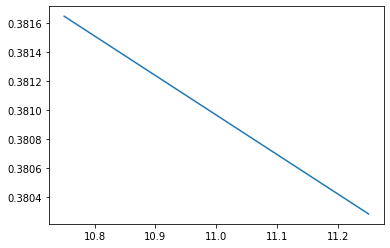

In [18]:
plt.plot(C,accuracy)

In [ ]:
#print(model.best_estimator_)
y_pred = model.predict(X_test_transformed)
print(accuracy_score(y_test,y_pred))

Confusion matrix:
[[128  21  19  10   2   9   7  11   8   5]
 [ 33  39  53  14  20  19  16   8  20  13]
 [ 18  30  81  32  26  34  15  17  19  21]
 [  8  20  48  22  16  19  32  27   6  10]
 [ 11  16  42  19  20  18  23  23  14   5]
 [ 10  19  44  20  12  25  27  26  17   6]
 [ 16  11  32  18   9  28  28  31  11  16]
 [ 14  17  32  17   8  17  33  36  20  16]
 [  8  12  19   8  12  15  26  28  40  33]
 [ 18  11  13  11  14  14  19  39  40  58]]


In [ ]:
# Fitting
model.fit(X_train_transformed, y_train)

In [ ]:
model.best_estimator_

### 5.3 GridSearch Classification Report

In [ ]:
pd.DataFrame(X_test_transformed)

In [35]:
y_pred = model.best_estimator_.predict(X_test_transformed)
pd.DataFrame(y_pred).value_counts()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.75      0.59       220
           1       0.31      0.19      0.23       235
           2       0.27      0.41      0.32       293
           3       0.24      0.11      0.15       208
           4       0.35      0.06      0.10       191
           5       0.14      0.08      0.10       206
           6       0.18      0.13      0.15       200
           7       0.19      0.20      0.19       210
           8       0.18      0.25      0.21       201
           9       0.30      0.48      0.37       237

    accuracy                           0.28      2201
   macro avg       0.26      0.27      0.24      2201
weighted avg       0.27      0.28      0.25      2201



In [113]:
y_pred

array([7, 7, 7, ..., 7, 7, 7])

In [36]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred)

0.2780554293502953

### 5.4 Further Improvement

In [ ]:
pipe = make_pipeline(PCA(),SVC(class_weight="balanced"))
param_grid = {
    "pca__n_components": range(200, 600, 1),
    "svc__kernel": ["linear"],
    "svc__C": [10],#[10, 20, 50, 100, 200, 500, 1000, 2000, 5000],
    "svc__gamma": [0.0001]#[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}

clf = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head(20)

In [ ]:
clf.best_estimator_

In [ ]:
clf.best_estimator_.score(X_test, y_test)

In [ ]:
y_pred = clf.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
# Number of Components that give out the best score
best_n_components = clf.get_params()['pca__n_components']
best_n_components